## Example script
Takes you through the basics of generating the paper's figures and simulations. 
#### Load dependencies and other problem constants

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

d = get_pomdp()
alpha = read_alpha()
g = get_grid(d.pomdp.states)

RectangleGrid with 2420 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out gen_pairwise_policy line to use pre-computed policy datafile for the next part

In [2]:
gen_pairwise_policy(d)

Running QMDP alpha vectors approximation...
QMDP computations done!
cputime = 1.34e+02 sec

Writing alpha vector to ../data/alpha.jld...done in 1.53e-01.



Policy(2421x25 Array{Float64,2}:
 -16.0     -10.0     -8.0      -10.0     …  -8.0      -10.0     -16.0   
 -16.0085  -10.0     -8.00023  -10.0        -8.0      -10.0     -16.0031
 -16.041   -10.0188  -8.00248  -10.0003     -8.0017   -10.0017  -16.022 
 -16.1062  -10.2308  -8.01074  -10.0021     -8.00677  -10.0103  -16.1487
 -16.3268  -10.5339  -8.03462  -10.0187     -8.02362  -10.1636  -16.2093
 -17.1189  -10.8201  -8.09332  -10.0321  …  -8.16647  -10.2637  -16.2188
 -16.7087  -10.8563  -8.13302  -10.0268     -8.21508  -10.3189  -16.0601
 -16.539   -10.1045  -8.12875  -10.0213     -8.1259   -10.1947  -16.0195
 -16.1564  -10.0276  -8.11694  -10.0004     -8.10905  -10.0022  -16.0063
 -16.0423  -10.0     -8.03387  -10.0        -8.0      -10.0     -16.0006
 -16.0     -10.0     -8.01432  -10.0     …  -8.0      -10.0     -16.0   
 -16.065   -10.0     -8.0      -10.0        -8.0      -10.0     -16.0004
 -16.3386  -10.0152  -8.004    -10.0004     -8.02632  -10.0036  -16.073 
   ⋮              

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:90.0:360.0)

Slider{Float64}([Input{Float64}] 10.0,"v0",10.0,10.0:10.0:20.0)

Slider{Float64}([Input{Float64}] 10.0,"v1",10.0,10.0:10.0:20.0)

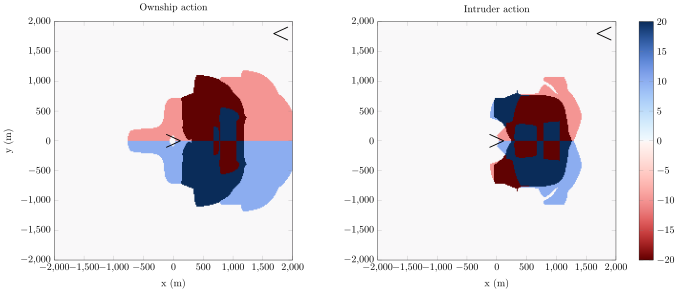

In [3]:
viz_pairwise_policy(d)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap

Options{:ToggleButtons,Function}([Input{Function}] maxsum,"utilFn",maxsum,"maxsum",["maxsum"=>maxsum,"maxmin"=>maxmin])

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

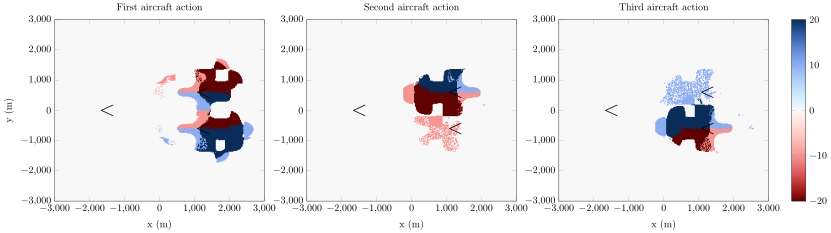

In [4]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 4.750e-01 ms

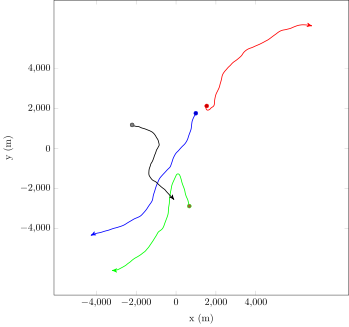

In [5]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [7]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 5.44e-01 sec
maxmin nlms: [0,0,0,0,0]
maxmin nlms bool: [0,0,0,0,0]
average maxmin times: [1.6097276e-5,5.913185499999999e-5,7.279092100000002e-5,1.2446571e-5,3.694160199999999e-5]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [1.5966165e-5,5.632035400000001e-5,7.760044600000001e-5,1.1890529999999998e-5,4.1096316000000005e-5]
nuavs = 3: cputime = 1.07e+00 sec
maxmin nlms: [0,0,0,45,0]
maxmin nlms bool: [0,0,0,1,0]
average maxmin times: [3.3611986999999994e-5,8.477986400000001e-5,0.00036714670299999995,1.9524138999999998e-5,6.5328529e-5]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [4.223538999999999e-5,0.000106500248,0.000337571415,1.9767001999999998e-5,7.710934600000001e-5]
nuavs = 4: cputime = 1.21e+00 sec
maxmin nlms: [0,0,0,87,0]
maxmin nlms bool: [0,0,0,3,0]
average maxmin times: [5.584070700000001e-5,0.000172025732,0.0005068914449999999,3.2241093e-5,0.000144833196]
maxsum